<h1 align= 'center'> Iris-Flowers Classification </h1>

## Introduction
The Iris flower dataset or *Fisher's Iris dataset* is a multivariate dataset introduced by the British statistician and biologist **Ronald Fisher** in his 1936 paper ***The use of multiple measurements in taxonomic problems*** as an example of linear discriminant analysis. It is sometimes called *Anderson's Iris dataset* because **Edgar Anderson** collected the data to quantify the morphologic variation of Iris flowers of three related species.

The dataset consists of 50 Samples from each of **Three Species** of Iris. 

| Species | Iris Setosa | Iris Versicolor | Iris Virginica |
| --- | ------------------- | ------------------- | ------------------- |
|  | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="200" height="200"/> | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg" width="200" height="200"/> | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg" width="200" height="200"/> | 


Four Features were measured from each Sample: 
- The Length and the Width of the Sepals (in centimeters)
- The Length and the Width of the Petals (in centimeters)

Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

<br></br>

## Use of the Data
The use of this dataset in Cluster Analysis however is not common, since the dataset only contains two clusters with rather obvious separation. 
- **One of the Clusters contains Iris Setosa, while the other Cluster contains both Iris Virginica and Iris Versicolor and is not separable without the species information Fisher used.**

This makes the data set a good example to explain the difference between Supervised and Unsupervised Techniques in Data Mining.

## 0. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [20]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Loading the Required Data

In [21]:
# Importing & Viewing the data.
df = pd.read_csv('iris.data')
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
print("Dimensionality of the dataset: ", df.shape)

Dimensionality of the dataset:  (150, 5)


## 2. Exploratory Data Analysis

**PROBLEM:** To Classify the different Species in the Iris dataset.

### Missing Values

- In any dataset we will initially try to find out where the missing data are. 

<AxesSubplot:>

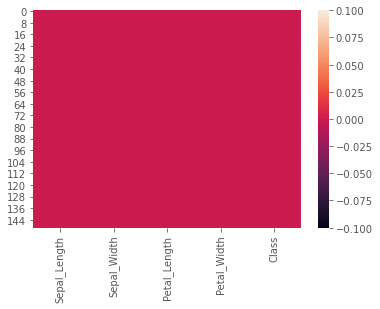

In [23]:
# To plot a graphic of missing values
import seaborn as sns
sns.heatmap(df.isna())

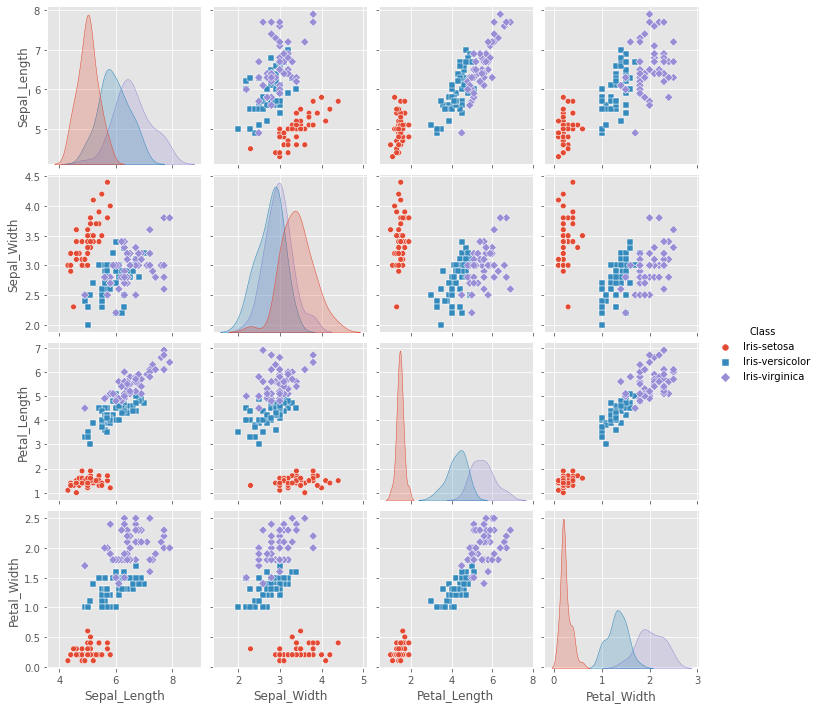

In [24]:
## Pairplots
sns.pairplot(df, hue= 'Class', height= 2.5, markers= ['8', 's', 'D'])

- We can see here that Iris Sertosa distinguishes itself from the other two species extensively. 

## 3. Model Building

We will not be performing any Feature Engineering as there are neither any Missing Values nor any Outliers. Feature Scaling is also not required as all the values seem to be Normalized. 
- We will be Encoding our Target Variable (Class).


In [25]:
## Obtaining the Independent and Dependent Variables.
X = df.drop(columns= 'Class')
y = df['Class']

In [27]:
## Label Encoding the Target Variable
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

y = encoder.fit_transform(y)

### **Encoding Table**
| **Species** | **Encoded Value** |
| --- | --- |
| Iris Setosa | 0 |
| Iris Versicolor | 1 |
| Iris Virginica | 2 |

In [29]:
## Splitting the Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 50)

### Model Training

In any model building, we mainly focus on 3 main steps:

- Fitting the model and finding the accuracy (accuracy score) of the fitted model.
- Perform K-Fold Cross Validation (K needs to be specified).
- Find the accuracy of the Cross Validation. 

**We will be running a whole bunch of models to figure out which model is best suited for our data.**

In [32]:
# Machine Learning
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import RandomForestClassifier

In [33]:
start_time = time.time()
algorithm = RandomForestClassifier()

## Step 1:
model = algorithm.fit(X_train, y_train)      # Creating the model. We will fit the algorithm to the training data.
rf_acc = round(model.score(X_train, y_train)*100, 2)

## Step 2:  --> This code performs Cross Validation automatically.
rf_train_pred = model_selection.cross_val_predict(algorithm, X_train, y_train, cv= 10, n_jobs= -1)

## Step 3:  --> Cross Validation accuracy metric.
rf_acc_cv = round(metrics.accuracy_score(y_train, rf_train_pred)*100, 2)

rf_time = (time.time()- start_time)

In [34]:
# Random Forest Classifier
print('Accuracy of the model is: ', rf_acc)
print('Accuracy of 10-Fold CV is: ', rf_acc_cv)
print('Running time is: ', datetime.timedelta(seconds= rf_time))

Accuracy of the model is:  100.0
Accuracy of 10-Fold CV is:  93.33
Running time is:  0:00:36.464066


- <b>NOTE:</b> We care more about the accuracy of cross validation, as the metrics we get from the model can randomly score higher than usual.

> We can see that Random Forest has the best result. Since guessing would give us 50% accuracy (0 or 1 or 2), getting above 90% is outstanding.

- Cross Validation is more robust than the .fit() model as it does multiple passes over the data instead of one.

## 4. Prediction on the Test dataset

Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset.

In [35]:
# Make predictions using Random Forest Classifier.
predictions = model.predict(X_test)
predictions

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [36]:
print('Accuracy of the Test Dataset is: ',round(metrics.accuracy_score(y_test, predictions)*100, 2))

Accuracy of the Test Dataset is:  96.67
